## Project 07 : Time Series Forecasting (2/2)

### Importing all required libraries

In [1]:
#Loading Basic Packages
import pandas as pd
import numpy as np
from pandas import datetime

# importing ploting libraries
import matplotlib.pyplot as plt 
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-3cba430559f4>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## Problem (2/2) : Rose Wine Sales

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

### 1. Read the data as an appropriate Time Series data and plot the data.

In [2]:
# Loading the dataset into the dataframe as df
df = pd.read_csv("Rose.csv")

In [3]:
# Checking the head of the data
df.head()

,YearMonth,Rose
0,1980-01,112.0
1,1980-02,118.0
2,1980-03,129.0
3,1980-04,99.0
4,1980-05,116.0


In [4]:
# Checking the shape & info of the dataset
r, c = df.shape
print('No of Rows in the dataset :', r)
print('No of Columns in the dataset :', c)

No of Rows in the dataset : 187
No of Columns in the dataset : 2


In [5]:
# Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  187 non-null    object 
 1   Rose       185 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.0+ KB


From the above we can say the following 
1. The dataset consists of Two Variables i.e. **YearMonth** & **Rose Wine Sales Value**
2. There are around 187 observations & we can see there are 2 missing values in the Rose variable.
3. Dataset consists of two variables which are of Object & Integer.

In order to build our Time Series Forecasting we cannot build as it is as the model can't take the values of variable MonthYear. 

Hence we need to convert the dataset to **appropriate Time Series Data**

In [6]:
# Creating Time Stamps and adding it to the dataframe to make it as time series data

Time_Stamp = pd.date_range(start='1980-01',periods=len(df),freq='M')

# Loading the time stamp into our dataframe
df['Time_Stamp'] = Time_Stamp

# Setting the Time_Stamp as index so as to make it appropriate time series data
df = df.set_index(keys='Time_Stamp')

# Dropping the YearMonth Variable which is not required for our Time Series Analysis
df.drop(['YearMonth'], axis = 1 , inplace = True)

In [7]:
# Checking the head of the dataset after converting it to appropriate Time Series Data
print(df.head())

print('\n')

# Checking the tail of the dataset after converting it to appropriate Time Series Data
print(df.tail())

             Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0


            Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0


From the above we can see that we have created an appropriate Time Series Data for our dataset

#### Plotting the Rose Wine Sales Data

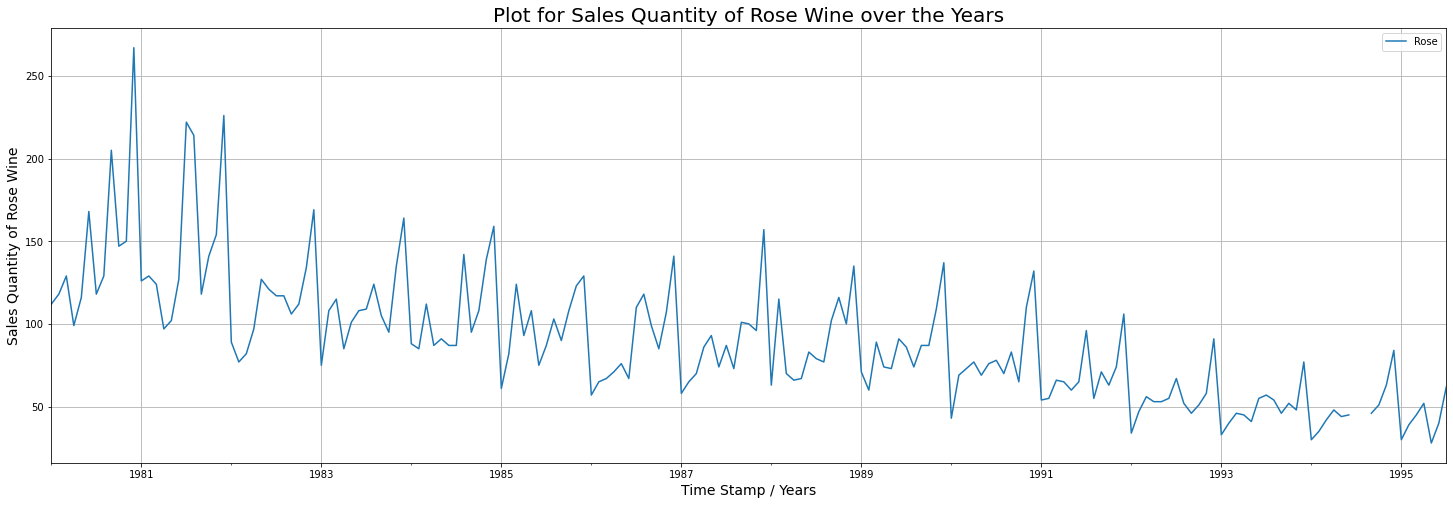

In [8]:
df.plot(grid=True, figsize= (25,8));
plt.xlabel('Time Stamp / Years', fontsize = 14)
plt.ylabel('Sales Quantity of Rose Wine', fontsize = 14)
plt.title('Plot for Sales Quantity of Rose Wine over the Years', fontsize = 20)
plt.show()

From the above plot we can say the following

1. Observe Trend and its declining at the end of the plot.
2. Presence of Seasonality

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

#### Checking for any Null values in the Dataset

In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  
    return missing_data
missing_check(df)

,Total,Percent
Rose,2,0.010695


From the above we can see that there are two missing values in the Rose Wine Sales Data. In order to build time series forecasting the most important thing is that the there should not be any gap in the time stamp. 
Hence here we will be imputing missing values. Imputation can be done with following ways

1. Take Average of nearest Neighbours 
2. Take average of Seasons from all available years
3. Linear Interpolation
4. Polynomial such as Quadratic or Cubic interpolation
5. Spline

Here in this data set we will be proceeding with Linear Interpolation method

In [10]:
df[df.isna().any(axis=1)]

,Rose
Time_Stamp,
1994-07-31,NaN
1994-08-31,NaN


From the above we can see that there is missing value in July-1994 & Aug-1994

In [13]:
# Interpolating using Linear method. 
df.interpolate(method = 'linear', inplace = True)

In [14]:
df.isna().sum()

Rose    0
dtype: int64

From the above we can see the values have been imputed and now the null values is 0

In [15]:
# Checking the basic measures of descriptive statistics of the Time Series

df.describe()

,Rose
count,187.000000
mean,89.914439
std,39.238325
min,28.000000
25%,62.500000
50%,85.000000
75%,111.000000
max,267.000000


From the above data we can say the following
1. Minimum value is 28
2. Maximum value is 267
3. Mean value is 89

#### Yearly Boxplot

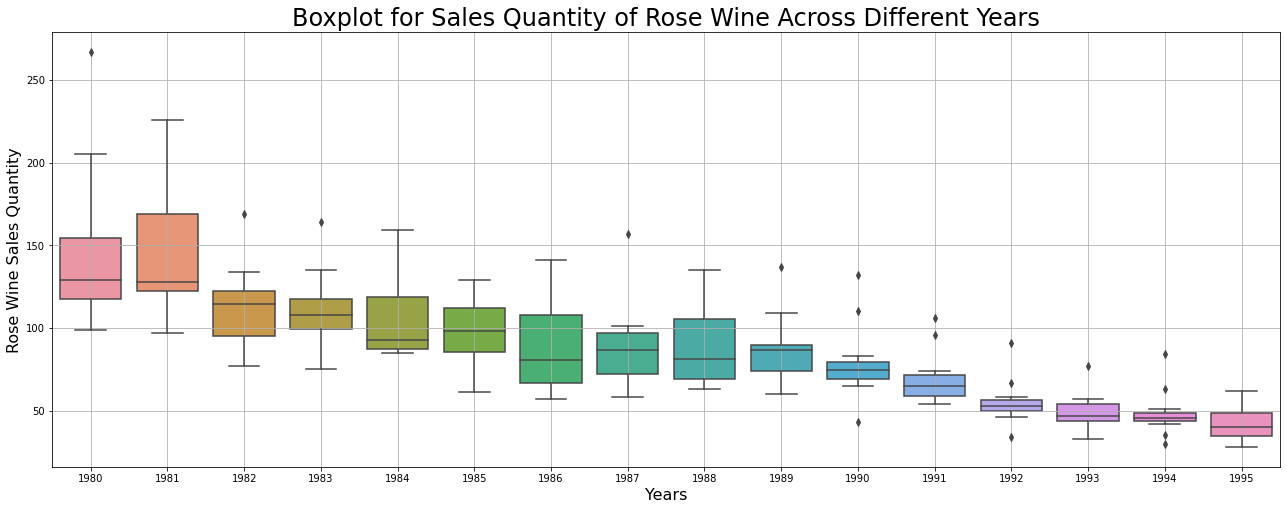

In [17]:
fig, ax = plt.subplots(figsize=(22,8))
sns.boxplot(df.index.year, df['Rose'], ax=ax, whis=1.5)
plt.grid();
plt.xlabel('Years', fontsize = 16);
plt.ylabel('Rose Wine Sales Quantity',  fontsize = 16);
plt.title('Boxplot for Sales Quantity of Rose Wine Across Different Years', fontsize = 24)
plt.show();

From the above plot we can say the following,

1.	We can observe that the trend is on the downside and declining at the end of the plot
2.	Rose Wine sales quantity reduced from 1990 to 1995.
3.	Rose Wine sales were significantly high during the years 1980,1981.


#### Monthly Boxplot

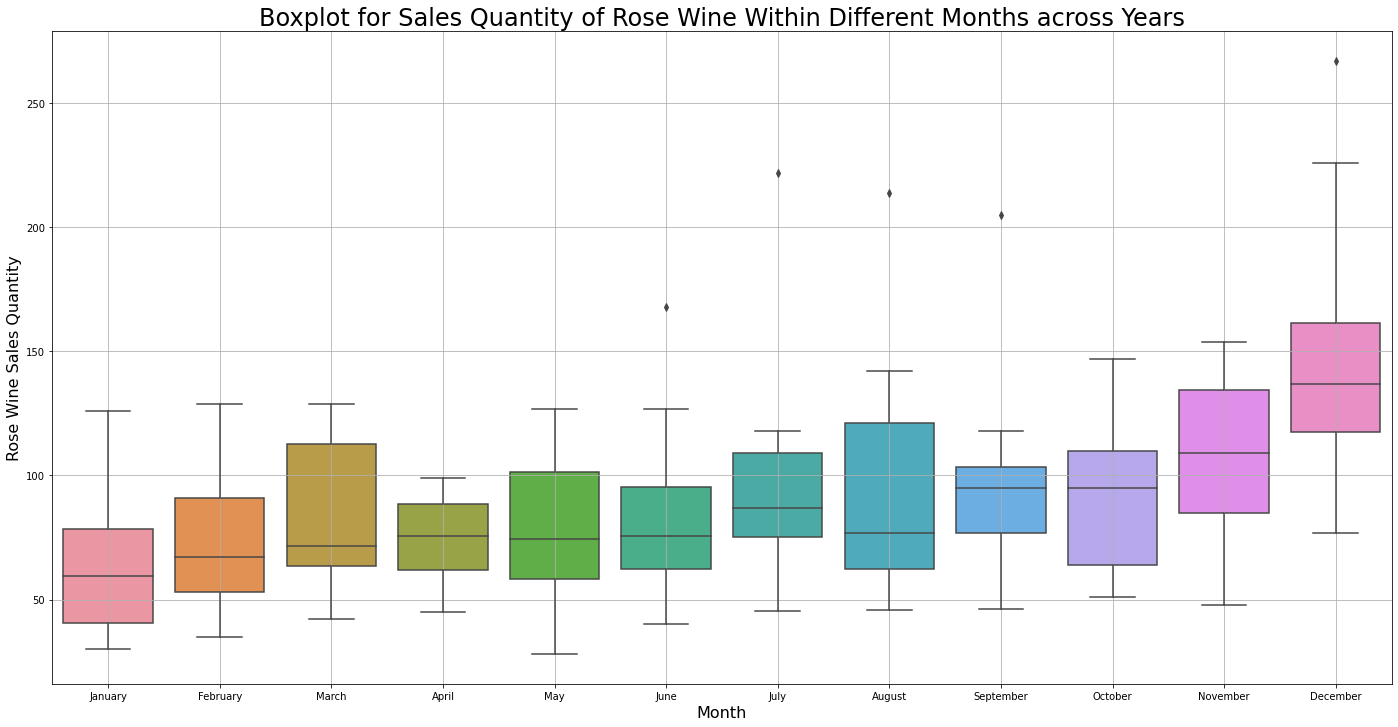

In [18]:
fig, ax = plt.subplots(figsize=(24,12))
sns.boxplot(x = df.index.month_name(),y = df['Rose'])
plt.grid();
plt.xlabel('Month', fontsize = 16);
plt.ylabel('Rose Wine Sales Quantity',  fontsize = 16);
plt.title('Boxplot for Sales Quantity of Rose Wine Within Different Months across Years', fontsize = 24)
plt.show();

From the above box plot we can see the following,

1.	Sales quantity were less in the month of January, February, April & June across all years
2.	Sales quantity were more in the months of March, May, August, October, November & December across all years.
3.	Specifically, the sales quantity was high during the month of November & December across all years. Demand would have been higher due to the Christmas holidays. 


#### Plotting Empirical Cumulative Distribution

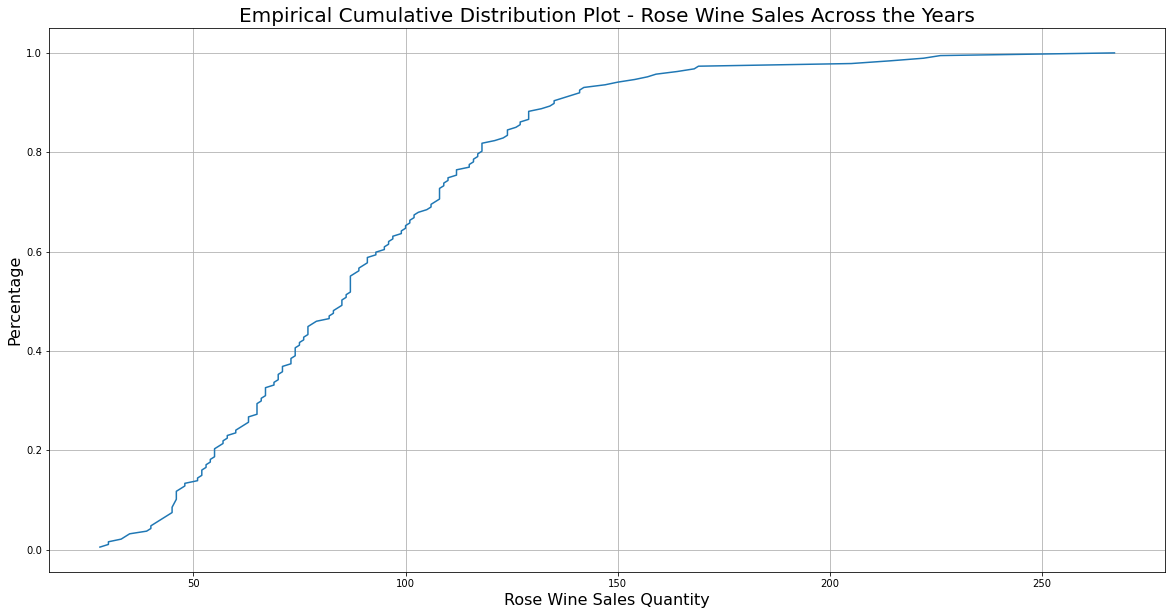

In [19]:
# Importing required library
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (20,10))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statsmodel");
plt.grid();
plt.xlabel('Rose Wine Sales Quantity', fontsize = 16)
plt.ylabel('Percentage', fontsize = 16)
plt.title('Empirical Cumulative Distribution Plot - Rose Wine Sales Across the Years', fontsize = 20)
plt.show();

From the above Empirical Cumulative Distribution Plot we can say that around **60% of the Sales quantity is less than 90**

#### Plotting a Time Series Month plot to under stand the spread across different months

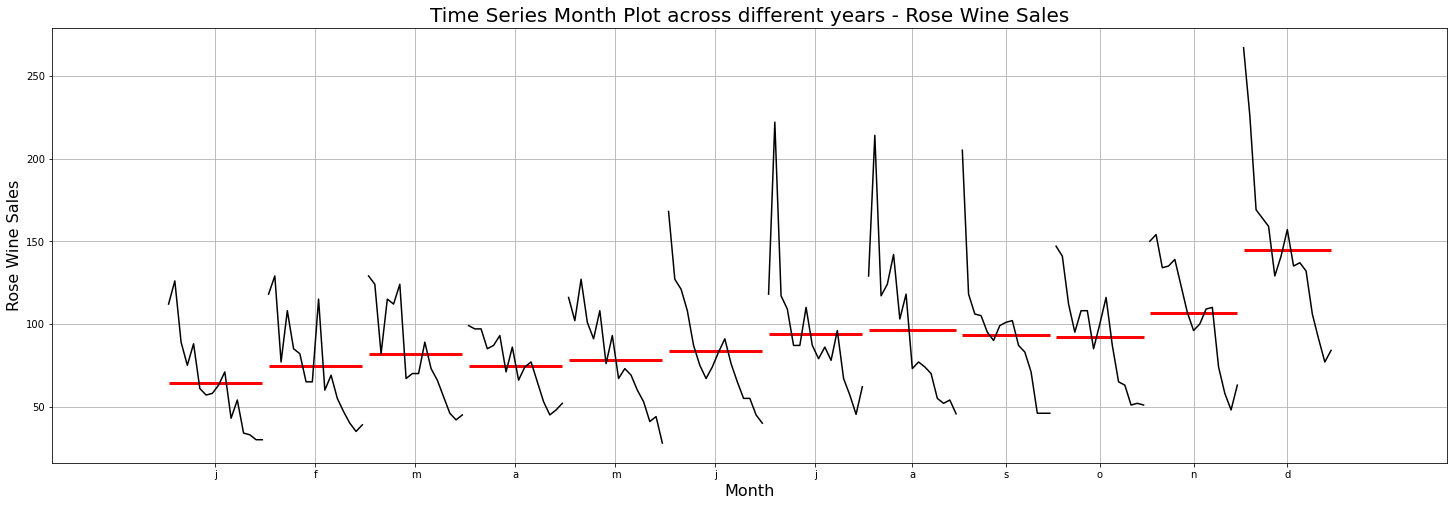

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 25,8

# Importing required library for plotting
from statsmodels.graphics.tsaplots import month_plot

month_plot(df['Rose'],ylabel='Sales')
plt.title('Time Series Month Plot across different years - Rose Wine Sales', fontsize = 20)
plt.xlabel('Month', fontsize = 16);
plt.ylabel('Rose Wine Sales', fontsize = 16)


plt.grid();
plt.show()

From the above plot we can see the Time Series Month Plot across different months. We can see high spikes in the month of July, August,September & December

#### Plotting Average Rose Wine Sales Per Month

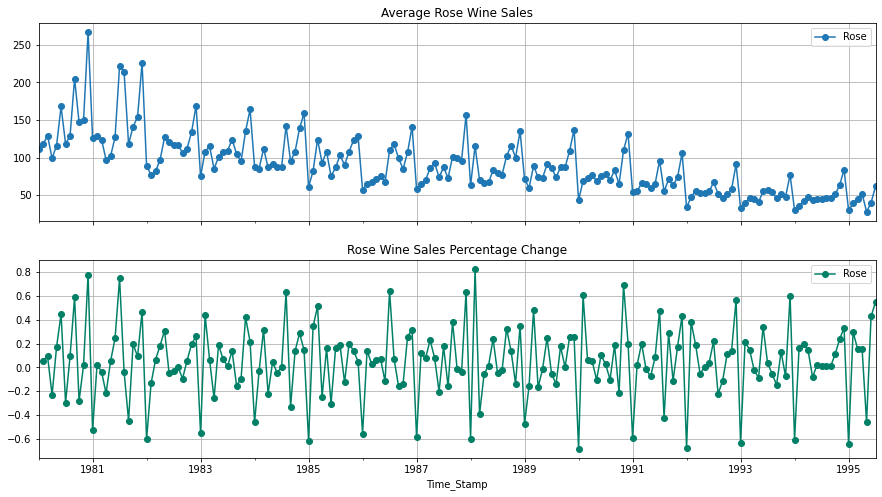

In [21]:
# group by date and get average sparkling wine sales, and precent change
average    = df.groupby(df.index)["Rose"].median()
pct_change = df.groupby(df.index)["Rose"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sparking wine sales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Rose Wine Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Rose Wine Sales Percentage Change",grid=True)

From the above plots we can see the following

1. Average Rose Wine Sales quantity across the years which can been seen that its declining over the years
2. Percentage change in the Rose Wine Sales quantity is almost constant over the years. 

### Decomposing the Time Series

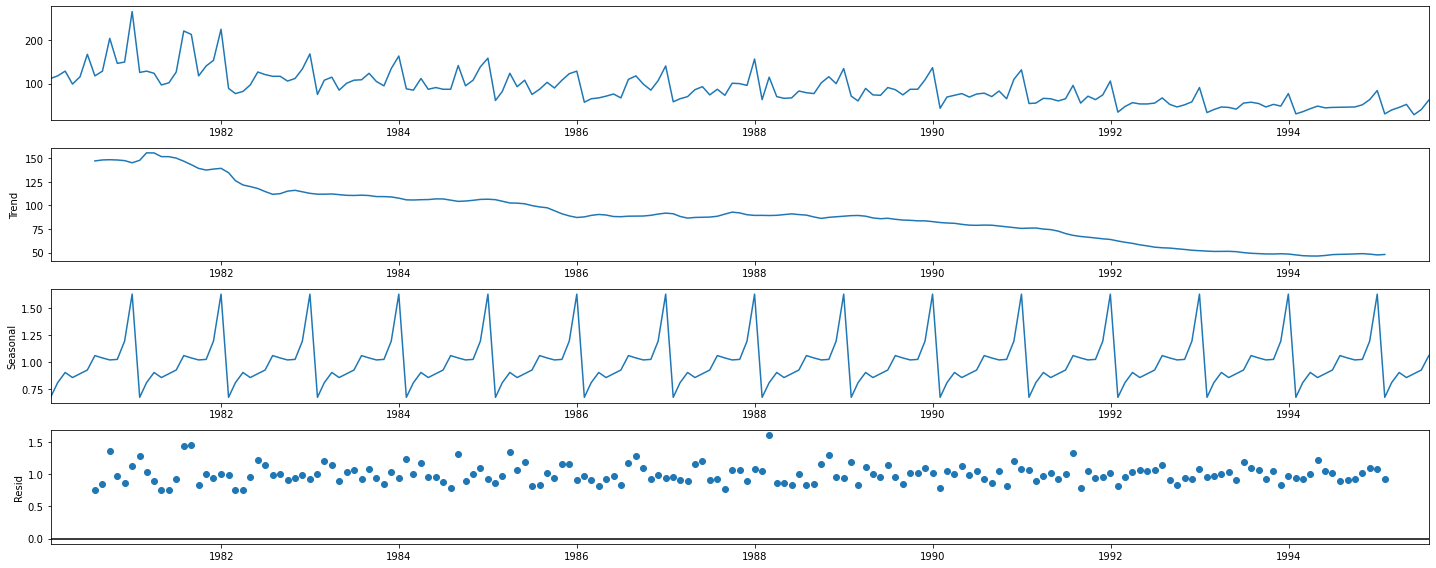

In [86]:
# Here we will be selecting multiplicative model for decomposing

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

From the above multiplicative decomposing we can see that there is Trend & Seasonality

### 3. Split the data into training and test. The test data should start in 1991.

In [25]:
# Splitting the sales quantity below 1991 into our train data set
train = df[df.index.year < 1991]

# Splitting the Sales quantity above/equal to 1991 into our test data set
test = df[df.index.year >= 1991]

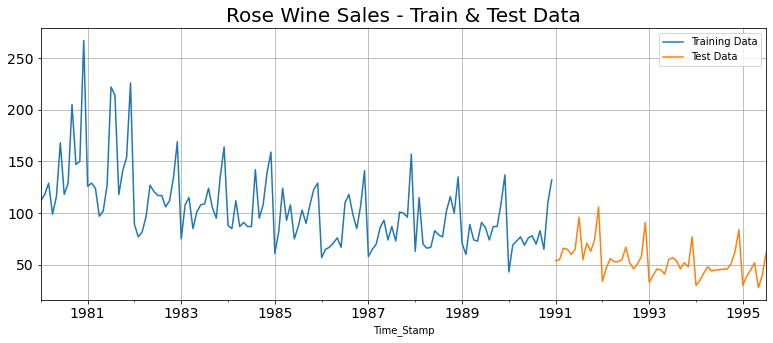

In [26]:
train['Rose'].plot(figsize=(13,5), fontsize=14)
test['Rose'].plot(figsize=(13,5), fontsize=14)
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.title('Rose Wine Sales - Train & Test Data', fontsize = 20)
plt.show()

From the above plot we can see that the data is divided into Train & Test Dataset

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

### Model 1 : Linear Regression

For this particular linear regression, we are going to regress the 'Rose Wine Sales Quantity' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [27]:
# Appending the values against the time stamp into the train_time variable
train_time = []
for i in range(len(train)):
    train_time.append(i + 1)

In [28]:
# Appending the values against the time stamp into the test_time variable
test_time = []
for i in range(len(test)):
    test_time.append(i + 133)

From the above we can say that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [29]:
# Taking copy of the train data into our Linear Regression Training Set
lr_train = train.copy()

# Taking copy of the test data into our Linear Regression Test Set
lr_test = test.copy()

In [30]:
lr_train['time'] = train_time
lr_test['time'] = test_time

Now that our training and test data has been modified, let us go ahead use **Linear Regression** to build the model on the training data and test the model on the test data.

In [31]:
# Importing Linear Regression Library from sklearn
from sklearn.linear_model import LinearRegression

# Creating Linear Regression Model
lr = LinearRegression()

# Fitting our X,y variables to our Linear Regression Model
lr.fit(lr_train[['time']],lr_train['Rose'].values)

LinearRegression()

#### Predicting on the Train & Test Data & Ploting the Same

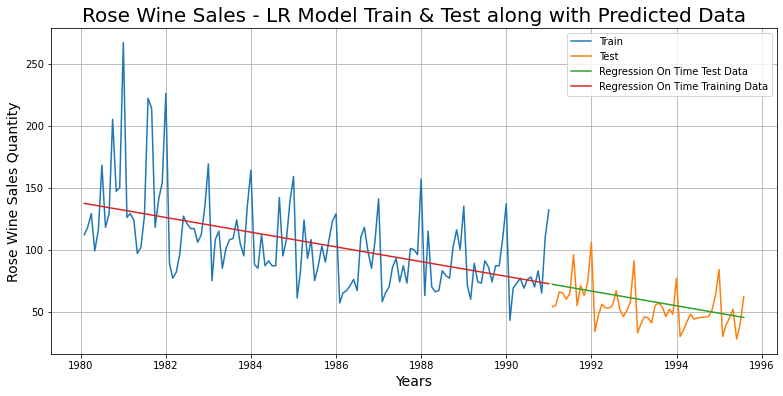

In [32]:
lr_train['Reg']  = lr.predict(lr_train[['time']])

lr_test['Reg']   = lr.predict(lr_test[['time']])


plt.figure(figsize=(13,6))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')
plt.plot(lr_test['Reg'], label='Regression On Time Test Data')
plt.plot(lr_train['Reg'], label='Regression On Time Training Data')
plt.legend(loc='best')
plt.grid();
plt.xlabel('Years', fontsize = 14 )
plt.ylabel('Rose Wine Sales Quantity', fontsize = 14 )
plt.title('Rose Wine Sales - LR Model Train & Test along with Predicted Data', fontsize = 20);
plt.show()

From the above plot we can see the Linear Regression model has justed forecasted a straight line. Basically Linear Regression attempts to model the relationship between two variables by fitting a linear equation. 'Linear' in the sense a straight. Hence the prediction will also be fitted into a linear equation giving us an output as straight line. 

#### Defining the functions for calculating the accuracy metrics.

In [33]:
# Importing metrics library from sklearn
from sklearn import metrics

#### Linear Regression Model Evaluation

In [34]:
# Evaluating on Train Dataset
rmse_lr_train = metrics.mean_squared_error(train['Rose'],lr_train['Reg'],squared=False)
print("Regression On Time forecast on the Training Data,  RMSE is %3.3f" %(rmse_lr_train))

Regression On Time forecast on the Training Data,  RMSE is 30.718


In [35]:
# Evaluating on Test Dataset
rmse_lr_test = metrics.mean_squared_error(test['Rose'],lr_test['Reg'],squared=False)
print("Regression On Time forecast on the Test Data,  RMSE is %3.3f" %(rmse_lr_test))

Regression On Time forecast on the Test Data,  RMSE is 15.269


#### Creating Dataframe for Test RMSE and will be loading the RMSE values for all the models

In [36]:
results_df = pd.DataFrame({'Test RMSE': [rmse_lr_test]},index=['Linerar_Regression'])
results_df

,Test RMSE
Linerar_Regression,15.268955


From the above table we can see that the RMSE Value on Test Set for a Linear Regression Model is 15.268

### Model 2 : Naive Forecasting Model

Naive model is an Estimating technique in which the last period's actuals are used as this period's forecast, without adjusting them or attempting to establish causal factors

In [37]:
# Taking copy of the train data into our Naive's Training Set
naive_train = train.copy()

# Taking copy of the test data into our Naive's Test Set
naive_test = test.copy()

In [38]:
# Checking the top 5 records of Naive Train
naive_train.head()

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


In [39]:
# Checking the top records of Naive Test
naive_test.head()

,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


In [40]:
naive_train.tail()

,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


In [41]:
# Getting the last value of the Training set or most recent value of training set as a forecast value of Train Set
naive_train['forecast'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose'])) -1]

In [42]:
# Checking the top 5 for naive forecast on training set
naive_train['forecast'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: forecast, dtype: float64

In [43]:
 # Getting the last value of the Training set or most recent value of training set as a forecast value of Test Set
naive_test['forecast'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose'])) -1]

In [44]:
# Checking the top 5 for naive forecast on test set
naive_test['forecast'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: forecast, dtype: float64

#### Plotting the Naive's Train & Test along with Forecasted Values

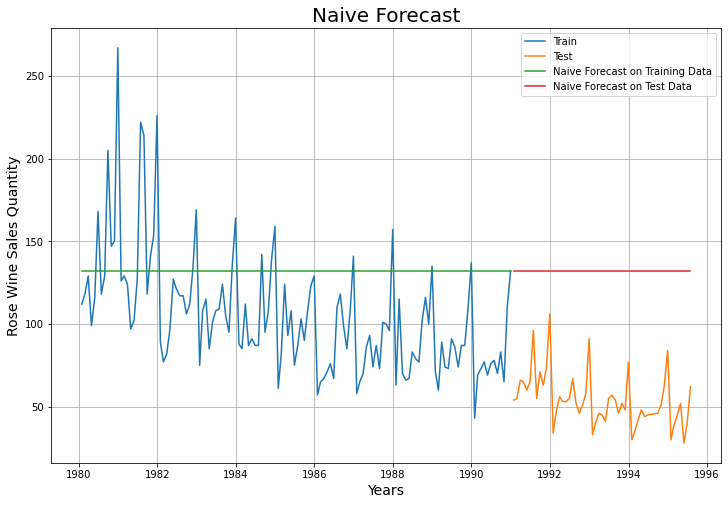

In [45]:
plt.figure(figsize=(12,8))
plt.plot(naive_train['Rose'], label='Train')
plt.plot(naive_test['Rose'], label='Test')
plt.plot(naive_train['forecast'], label='Naive Forecast on Training Data')
plt.plot(naive_test['forecast'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Years', fontsize = 14 )
plt.ylabel('Rose Wine Sales Quantity', fontsize = 14 )
plt.title("Naive Forecast", fontsize = 20)
plt.grid();
plt.show()

From the above plot we can see the model has forecasted poorly on both Train & Test Set. The model basically forecasted/predicted a straight line. Naive Forecast considers the recent value to forecast, hence in this model, the last value of training set is used for forecasting

#### Naive's Model Evaluation

In [46]:
# Evaluating on Training Data
rmse_naive_train = metrics.mean_squared_error(train['Rose'], naive_train['forecast'], squared=False)
print("Naive's Model Forecast on the Training Data, RMSE is %3.3f" %(rmse_naive_train))

Naive's Model Forecast on the Training Data, RMSE is 45.064


In [47]:
# Evaluating on Test Data
rmse_naive_test = metrics.mean_squared_error(test['Rose'], naive_test['forecast'], squared=False)
print("Naive's Model Forecast on the Test Data, RMSE is %3.3f" %(rmse_naive_test))

Naive's Model Forecast on the Test Data, RMSE is 79.719


#### Creating Dataframe for Test RMSE and will be loading the RMSE values for all the models

In [48]:
results_df2 = pd.DataFrame({'Test RMSE': [rmse_naive_test]},index=['Naive Forecast Model'])

results_df = pd.concat([results_df, results_df2])
results_df

,Test RMSE
Linerar_Regression,15.268955
Naive Forecast Model,79.718773


From the above table we can see the RMSE Value on Test data set of Linear Regression Model is better when compared to Naive Forecast Model

### Model 3: Simple Average Model

Simple average model is also similar to a Naive Forecast model, only difference is here in Simple Average Model we take the mean/median of the training set and stores as forecast value

In [49]:
# Taking copy of the train data into our Simple Average Training Set
sa_train = train.copy()

# Taking copy of the test data into our Simple Average Test Set
sa_test = test.copy()

#### For the Simple Average model we will forecast by using the average of the Training Values 

In [50]:
# Will be taking median value of the training set due to presence of outliers & store as forecast value
sa_train['median_forecast'] = train['Rose'].median() 
sa_train.head()

,Rose,median_forecast
Time_Stamp,,
1980-01-31,112.0,99.5
1980-02-29,118.0,99.5
1980-03-31,129.0,99.5
1980-04-30,99.0,99.5
1980-05-31,116.0,99.5


In [51]:
# Will be taking median value of the training set due to presence of outliers & store as forecast value even for test set
sa_test['median_forecast'] = train['Rose'].median() 
sa_test.head()

,Rose,median_forecast
Time_Stamp,,
1991-01-31,54.0,99.5
1991-02-28,55.0,99.5
1991-03-31,66.0,99.5
1991-04-30,65.0,99.5
1991-05-31,60.0,99.5


#### Ploting the Train & Test data along with Forecasted values of Simple Average Model

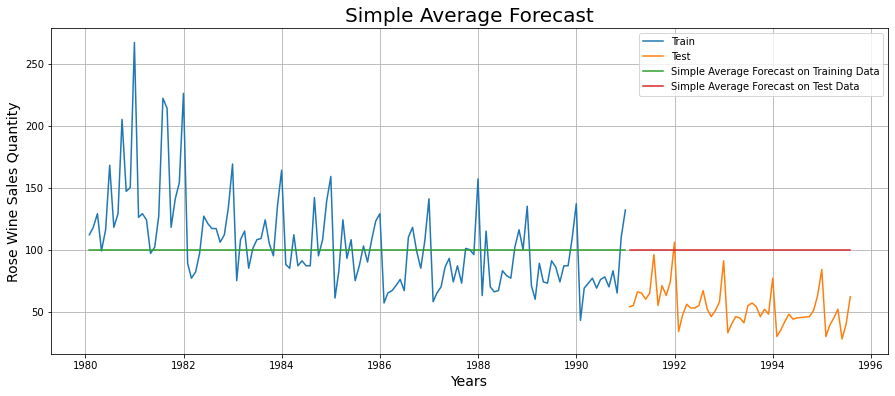

In [52]:
plt.figure(figsize=(15,6))
plt.plot(sa_train['Rose'], label='Train')
plt.plot(sa_test['Rose'], label='Test')
plt.plot(sa_train['median_forecast'], label='Simple Average Forecast on Training Data')
plt.plot(sa_test['median_forecast'], label='Simple Average Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel('Years', fontsize = 14 )
plt.ylabel('Rose Wine Sales Quantity', fontsize = 14 )
plt.title("Simple Average Forecast", fontsize = 20)
plt.grid();
plt.show()

From the above plot we can see the model has forecasted poorly on both Train & Test Set. The model basically forecasted/predicted a straight line. Since the forecasted values are median of the training set, the outcome will be a straight line

#### Simple Average Model Evaluation 

In [53]:
# Evaluating on Train Dataset
rmse_sa_model_train = metrics.mean_squared_error(train['Rose'], sa_train['median_forecast'], squared=False)
print("Simple Average Model Forecast on the Training Data, RMSE is %3.3f" %(rmse_sa_model_train))

Simple Average Model Forecast on the Training Data, RMSE is 36.442


In [54]:
# Evaluating on Test Dataset
rmse_sa_model_test = metrics.mean_squared_error(test['Rose'], sa_test['median_forecast'], squared=False)
print("Simple Average Model Forecast on the Test Data, RMSE is %3.3f" %(rmse_sa_model_test))

Simple Average Model Forecast on the Test Data, RMSE is 48.290


#### Creating Dataframe for Test RMSE and will be loading the RMSE values for all the models

In [55]:
results_df3 = pd.DataFrame({'Test RMSE': [rmse_sa_model_test]},index=['Simple Average Model'])

results_df = pd.concat([results_df, results_df3])
results_df

,Test RMSE
Linerar_Regression,15.268955
Naive Forecast Model,79.718773
Simple Average Model,48.289526


From the above table we can see that both Linear Regression Model & Simple Average Model performs better when compared to Naive Forecast Model

### Model 4: Triple Exponential Smoothing (Holt - Winter's Model)

The Reason for Choosing Holt - Winter's Model or Triple Exponential Model is By seeing the **decomposition plot** we can see the **presence of Trend & Seasonality**. Hence we will be considering the following parameters

1. Level i.e. $\alpha$
2. Trend i.e. $\beta$
3. Seaosnality i.e. $\gamma$

In [56]:
# Taking copy of the train data into our Holt-Winter's Model Training Set
tes_train = train.copy()

# Taking copy of the test data into our Holt-Winter's Model Test Set
tes_test = test.copy()

In [57]:
# Importing Holt-Winter's library from statsmodels.tsa.api
from statsmodels.tsa.api import ExponentialSmoothing

In [58]:
# Creating Triple Exponential Smoothing Model
tes = ExponentialSmoothing(tes_train['Rose'], trend = 'additive', seasonal = 'additive', freq = 'M', seasonal_periods = 12)

#Fitting our model
tes_autofit = tes.fit(optimized=True)

The above model is created by the best parameters Python thinks for the model. It uses a brute force method to choose the parameters

In [59]:
# Checking the parameters of the model
tes_autofit.params

{'smoothing_level': 0.08785282838428403,
 'smoothing_trend': 4.750900546548364e-06,
 'smoothing_seasonal': 0.0003888321680219632,
 'damping_trend': nan,
 'initial_level': 77.11036129701158,
 'initial_trend': -0.5507034501187452,
 'initial_seasons': array([ 38.58373015,  50.95130378,  58.95614925,  48.32221437,
         57.14275984,  62.60157198,  72.5131572 ,  78.61072041,
         74.61515095,  72.70513949,  90.79473256, 133.07311343]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

From the above we get the following parameters

1. Alpha = 0.087852
2. Beta  = 0.000005
3. Gamma = 0.000388

In [60]:
# Prediction on the training data
tes_train['predict_auto'] = tes_autofit.fittedvalues

# checking the prediction
tes_train.head()

,Rose,predict_auto
Time_Stamp,,
1980-01-31,112.0,115.143388
1980-02-29,118.0,126.684101
1980-03-31,129.0,133.375316
1980-04-30,99.0,121.806287
1980-05-31,116.0,128.072516


In [61]:
# Prediction on the test data
tes_test['predict_auto'] = tes_autofit.forecast(steps = len(tes_test))

# checking the prediction
tes_test.head()

,Rose,predict_auto
Time_Stamp,,
1991-01-31,54.0,42.581002
1991-02-28,55.0,54.397903
1991-03-31,66.0,61.852025
1991-04-30,65.0,50.667434
1991-05-31,60.0,58.937236


#### Plotting Train & Test along with forecasted values for Holt Winter's model

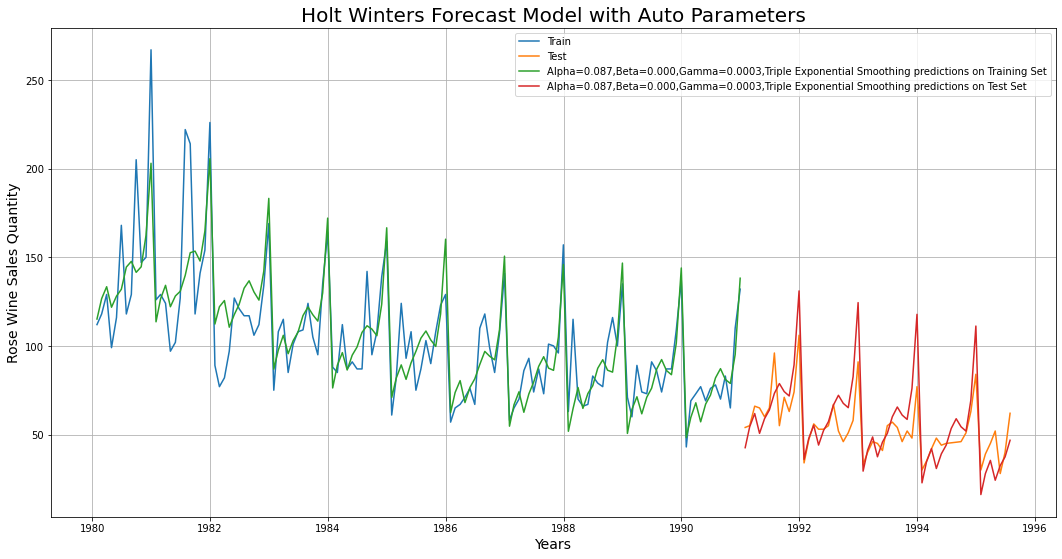

In [62]:
plt.figure(figsize=(18,9))
plt.plot(tes_train['Rose'], label='Train')
plt.plot(tes_test['Rose'], label='Test')

plt.plot(tes_train['predict_auto'], label='Alpha=0.087,Beta=0.000,Gamma=0.0003,Triple Exponential Smoothing predictions on Training Set')
plt.plot(tes_test['predict_auto'], label='Alpha=0.087,Beta=0.000,Gamma=0.0003,Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel('Years', fontsize = 14 )
plt.ylabel('Rose Wine Sales Quantity', fontsize = 14 )
plt.title("Holt Winters Forecast Model with Auto Parameters", fontsize = 20)
plt.grid();
plt.show()

From the above plot we can see that the Triple Exponential Smoothing Model forecasted good on both Train and Test data set with some differences on the test & train set.

#### Holt-Winter's Model Evaluation 

In [63]:
# Evaluating on Train Dataset
rmse_tes_auto_train  = metrics.mean_squared_error(train['Rose'], tes_train['predict_auto'], squared=False)
print("Triple Exponential Smoothing Model Forecast on the Training Data, RMSE is %3.3f" %(rmse_tes_auto_train))

Triple Exponential Smoothing Model Forecast on the Training Data, RMSE is 19.479


In [64]:
# Evaluating on Test Dataset
rmse_tes_auto_test  = metrics.mean_squared_error(test['Rose'], tes_test['predict_auto'], squared=False)
print("Triple Exponential Smoothing Model Forecast on the Test Data, RMSE is %3.3f" %(rmse_tes_auto_test))

Triple Exponential Smoothing Model Forecast on the Test Data, RMSE is 14.241


#### Creating Dataframe for Test RMSE and will be loading the RMSE values for all the models

In [65]:
results_df4 = pd.DataFrame({'Test RMSE': [rmse_tes_auto_test]},index=['Holt-Winters Model with Auto Parameters'])

results_df = pd.concat([results_df, results_df4])
results_df

,Test RMSE
Linerar_Regression,15.268955
Naive Forecast Model,79.718773
Simple Average Model,48.289526
Holt-Winters Model with Auto Parameters,14.241476


From the above data we can see that there is significant drop in RMSE value on Test dataset. Which tells us that out of the 4 models, Triple Exponential Smoothing Model is better when compared to the other three

### Model 5: Triple Exponential Smoothing (Holt - Winter's Model) with Best $\alpha$, $\beta$ and $\gamma$  combinations

In [66]:
# First we need to create an empty dataframe to store the values from the loop

smoothing_parameters = pd.DataFrame({'Alpha':[], 'Beta':[],'Gamma':[], 'Train RMSE':[],'Test RMSE':[]})
smoothing_parameters 

,Alpha,Beta,Gamma,Train RMSE,Test RMSE


In [67]:
# Looping for finding out the optimum combination of all three parameters

for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            
            # Fitting the model with the combination of alpha, beta & gamma values
            best_tes = tes.fit(smoothing_level=i,smoothing_trend=j,smoothing_seasonal=k, optimized=False)
            
            # Predicting on the train & test set
            tes_train['predict',i,j,k] = best_tes.fittedvalues
            tes_test['predict',i,j,k] = best_tes.forecast(steps = len(tes_test))
            
            # Evaluating on the train & test set
            rmse_tes_best_train = metrics.mean_squared_error(tes_train['Rose'],tes_train['predict',i,j,k],squared=False)
        
            rmse_tes_best_test = metrics.mean_squared_error(tes_test['Rose'],tes_test['predict',i,j,k],squared=False)
            
            smoothing_parameters = smoothing_parameters.append({'Alpha':i,'Beta':j,'Gamma':k,
                                                                'Train RMSE':rmse_tes_best_train,'Test RMSE':rmse_tes_best_test},ignore_index=True)        

In [68]:
# Getting the combinations 
smoothing_parameters.sort_values(by=['Test RMSE']).head()  

,Alpha,Beta,Gamma,Train RMSE,Test RMSE
32,0.1,0.4,0.3,24.790282,12.078156
13,0.1,0.2,0.4,23.758573,12.099563
22,0.1,0.3,0.3,24.436088,12.144658
12,0.1,0.2,0.3,24.168872,12.206673
23,0.1,0.3,0.4,24.090662,12.236610


From the above table we can see that with $\alpha$ = 0.1 , $\beta$ = 0.2, and $\gamma$ = 0.4 we get the best RMSE Test Value

#### Plotting Train & Test along with forecasted values for Holt Winter's model

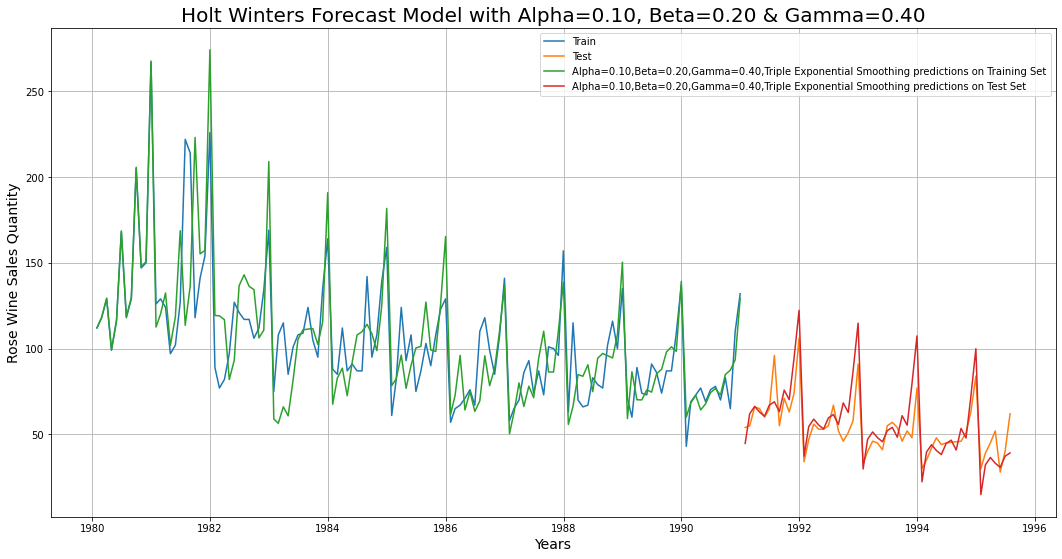

In [70]:
plt.figure(figsize=(18,9))
plt.plot(tes_train['Rose'], label='Train')
plt.plot(tes_test['Rose'], label='Test')

plt.plot(tes_train['predict',0.1,0.2,0.4], label='Alpha=0.10,Beta=0.20,Gamma=0.40,Triple Exponential Smoothing predictions on Training Set')
plt.plot(tes_test['predict',0.1,0.2,0.4], label='Alpha=0.10,Beta=0.20,Gamma=0.40,Triple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.xlabel('Years', fontsize = 14 )
plt.ylabel('Rose Wine Sales Quantity', fontsize = 14 )
plt.title("Holt Winters Forecast Model with Alpha=0.10, Beta=0.20 & Gamma=0.40", fontsize = 20)
plt.grid();
plt.show()

From the above plot we can see that the **Triple Exponential Smoothing Model (Alpha=0.10, Beta=0.20 & Gamma=0.40)** forecasted well on both Train and Test data set. There are only minor differences observed on the Test dataset. Overall better forecasted model on the test set when compared to earlier models.

#### Holt-Winter's Model ($\alpha$ = 0.10 , $\beta$ = 0.20, and $\gamma$ = 0.40) Evaluation 

In [71]:
# Evaluating on Train Dataset
rmse_tes_train  = metrics.mean_squared_error(train['Rose'], tes_train['predict',0.1,0.2,0.4], squared=False)
print("Holt-Winters Model (alpha = 0.1, beta = 0.2, gamma = 0.4) Forecast on the Training Data, RMSE is %3.3f" %(rmse_tes_train))

Holt-Winters Model (alpha = 0.1, beta = 0.2, gamma = 0.4) Forecast on the Training Data, RMSE is 23.759


In [72]:
# Evaluating on Test Dataset
rmse_tes_test  = metrics.mean_squared_error(test['Rose'], tes_test['predict',0.1,0.2,0.4], squared=False)
print("Holt-Winters Model (alpha = 0.1, beta = 0.2, gamma = 0.4) Forecast on the Test Data, RMSE is %3.3f" %(rmse_tes_test))

Holt-Winters Model (alpha = 0.1, beta = 0.2, gamma = 0.4) Forecast on the Test Data, RMSE is 12.100


#### Creating Dataframe for Test RMSE and will be loading the RMSE values for all the models

In [73]:
results_df5 = pd.DataFrame({'Test RMSE': [rmse_tes_test ]},index=['Holt-Winters Model (alpha = 0.10, beta = 0.20, gamma = 0.40)'])

results_df = pd.concat([results_df, results_df5])
results_df

,Test RMSE
Linerar_Regression,15.268955
Naive Forecast Model,79.718773
Simple Average Model,48.289526
Holt-Winters Model with Auto Parameters,14.241476
"Holt-Winters Model (alpha = 0.10, beta = 0.20, gamma = 0.40)",12.099563


From the above table we can see that **Triple Exponential Smoothing Model with (Alpha=0.10, Beta=0.20 & Gamma=0.40)** performed better with **RMSE value of 12.099 on the Test dataset**. Lowest of all when compared to earlier models

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
### Note: Stationarity should be checked at alpha = 0.05.

**Augmented Dickey-Fuller (ADF)** is the Statistical Test done for checking whether the data is Stationary or Non-Stationary. The Stationarity is decided based on the **p value**. Based on the p value hypothesis testing is done. Here we will be doing it on the training dataset


**Defining Null & Alternate Hypothesis** for the Training Dataset &  $\alpha$ = 0.05

**Null hypothesis Ho**      : Training Dataset is Non-Stationary

**Alternate hypothesis Ha** : Training Dataset is Stationary

In [74]:
# Importing adfuller library from statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller

In [81]:
## Test for stationarity of the series - Dicky Fuller test

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    plt.figure(figsize=(18,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

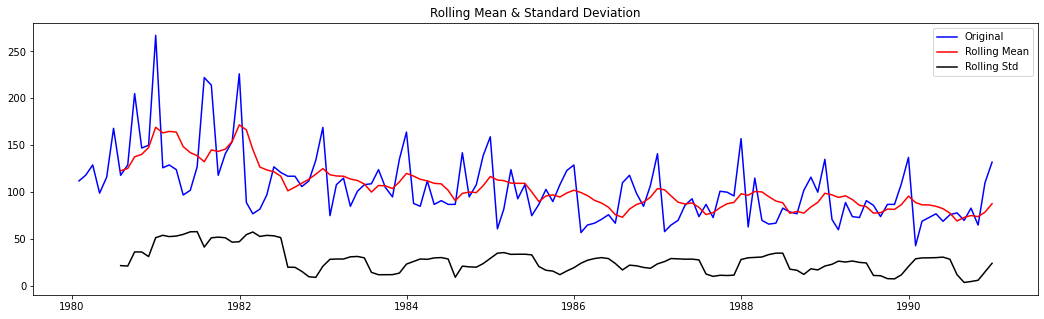

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



In [82]:
test_stationarity(train['Rose'])

From the above we can see that the **p-value is 0.66** > $\alpha$ (= 0.05). Hence we fail to reject the Null Hypothesis. 

Which means that the **Training Dataset @ 5% significant level** the Training Time Series is *Non-Stationary*

#### Let us take a difference of order 1 and check whether the Training Time Series is stationary or not.

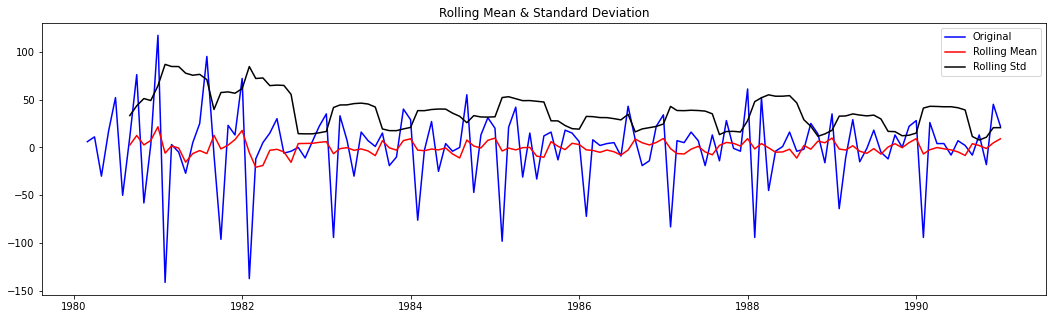

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [83]:
test_stationarity(train['Rose'].diff().dropna())

From the above we can see that the **p-value is < $\alpha$ (= 0.05)**. Hence we reject the Null Hypothesis. 

Which means that the **Training Dataset @ 5% significant level with difference of order 1** the Training Time Series is now *Stationary*

### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Model 6 : Automated Version of SARIMA (Auto Regressive Integrated Moving Average)

#### Checking the presence of Seasonality in our Data

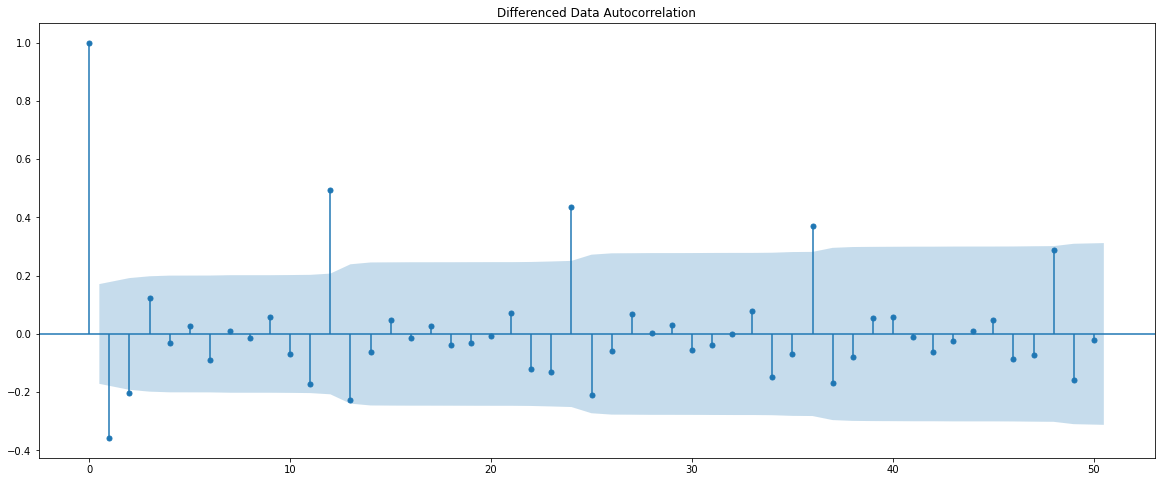

In [87]:
# Seasonality can be seen by check the Autocorrelation plot where we can find spikes at regular intervals.

plot_acf(train['Rose'].diff().dropna(),lags = 50,title='Differenced Data Autocorrelation')
plt.show()

From the above ACF plot at difference order of 1  we can clearly see that there is a spike outside the region at **every 12 intervals** which clearly tells us that there is **presence of Seasonality**. Hence based on this we will be **building SARMIA model**.

In this case we will be building a Automated Version of SARMIA model. In this model we choose the best combination of 'p' & 'q' values to determine the AR and MA orders respectively which gives us the Lowest AIC Value. 

AIC is nothing but Akaike Information Criterion. Lowest the AIC better is the model 

In [88]:
# We will be using the help of itertools in order to get combination of different values of p & q
# Here the value of d & D (order of difference) will be 1 constant (Obtained from the ADF test)

import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


Above is some of the combinations of 'p' & 'q' values with seasonality kept at 12 as obtained from the ACF plot

In [89]:
# We will create an empty dataframe to store the different values of AIC for different combinations of 'p','q', d & D values

SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [90]:
# Here we will build the SARIMA model with different combinations and fit the same to our Train dataset

import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1145.42308272074
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:976.4375296380894
SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438279514
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301639836
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776045
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1116.0207869386531
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:969.6913635755192
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.3269589658807
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601614
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654592
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:962.8794540697515
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:955.5735408945607
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.513269837442
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.3390729145957
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244218396
SARIMA(0,

From the above we can see difference combinations of 'p', 'q', along with AIC value

#### Getting the Least AIC value 

In [91]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
53,"(0, 1, 2)","(2, 1, 2, 12)",774.969120
107,"(1, 1, 2)","(2, 1, 2, 12)",776.940112
161,"(2, 1, 2)","(2, 1, 2, 12)",776.996101
35,"(0, 1, 1)","(2, 1, 2, 12)",782.153872
160,"(2, 1, 2)","(2, 1, 1, 12)",783.703652


From the above table we can see that we get lowest AIC i.e. 774.969 for following parameters.

1. p = 0
2. d = 1
3. q = 2
4. P = 2
5. D = 1
6. Q = 2
7. Seasonality (F) = 12

#### Building automated version of SARMIA model with best parameters

In [92]:
# Building automated version of SARMIA with best parameters on our training set

auto_sarima = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# Fitted the model in the auto_SARMIA function with Max iteration = 1000

sarima = auto_sarima.fit(maxiter=1000)

#### Summary of the Automated Version of SARMIA

In [93]:
print(sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -380.485
Date:                            Tue, 15 Jun 2021   AIC                            774.969
Time:                                    21:55:38   BIC                            792.622
Sample:                                         0   HQIC                           782.094
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9524      0.184     -5.167      0.000      -1.314      -0.591
ma.L2         -0.0764      0.126   

From the above summary we can see the following
1. Coefficients of different parameters of AR(p,P) & MA(q,Q) 
2. Skewness of the Dataset
3. Jarque-Bera Test Values
4. AIC (Akaike Information Criterion) Values
5. BIC Values
6. Heteroskedasticity. 

Out of which for us now AIC value is important

#### Diagnostics of the Auto SARIMA model

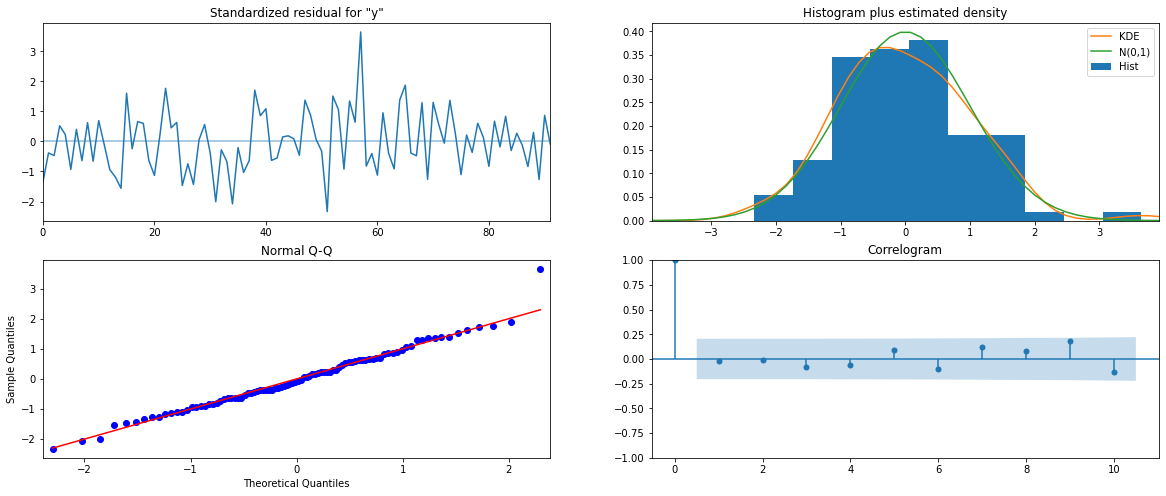

In [94]:
sarima.plot_diagnostics()
plt.show()

From the plot we can say the following,
1.	Residual is normally distributed which satisfies one of our assumptions for building SARIMA model
2.	There is no correlation between the residuals which can been seen in the Q-Q plot


#### Predicting/Forecasting on the Test Data set

In [95]:
sarima_predict = sarima.get_forecast(steps=len(test['Rose']))

#### Summary of the Predicted Values with 95% confidence iterval

In [96]:
sarima_predict.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,44.213931,14.221624,16.340059,72.087803
1,62.327123,14.300416,34.298823,90.355424
2,67.313329,14.302324,39.281288,95.345369
3,63.161121,14.305232,35.123382,91.198861
4,66.474140,14.310608,38.425864,94.522416


From the above table we can see the lower & upper range prediction/forecasting

#### Evaluating the Auto SARIMA model on Test Dataset

In [97]:
sarima_rmse = metrics.mean_squared_error(test['Rose'],sarima_predict.predicted_mean,squared=False)
print("Auto SARIMA model with (p=0, d=1, q=2, P=2, D=1, Q=2, F=12) Forecast on the Test Data, RMSE is %3.3f" %(sarima_rmse))

Auto SARIMA model with (p=0, d=1, q=2, P=2, D=1, Q=2, F=12) Forecast on the Test Data, RMSE is 16.500


From the above we can see that the RMSE on Test for Auto SARIMA is 16.50

#### Creating Dataframe for Test RMSE and will be loading the RMSE values for all the models till now

In [98]:
results_df6 = pd.DataFrame({'Test RMSE': [sarima_rmse]},index=['AUTO_SARIMA (p=0, d=1, q=2, P=2, D=1, Q=2, F=12)'])

results_df = pd.concat([results_df, results_df6])
results_df

,Test RMSE
Linerar_Regression,15.268955
Naive Forecast Model,79.718773
Simple Average Model,48.289526
Holt-Winters Model with Auto Parameters,14.241476
"Holt-Winters Model (alpha = 0.10, beta = 0.20, gamma = 0.40)",12.099563
"AUTO_SARIMA (p=0, d=1, q=2, P=2, D=1, Q=2, F=12)",16.500146


From the above table we can see that Auto SARIMA models performs good

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Model 7 : SARIMA model based on cut-off points of ACF & PACF

#### ACF & PACF with Stationary Time Series

**Note:** Here we will be considering d=1 as we have made the training data stationary by taking 1st order of differencing

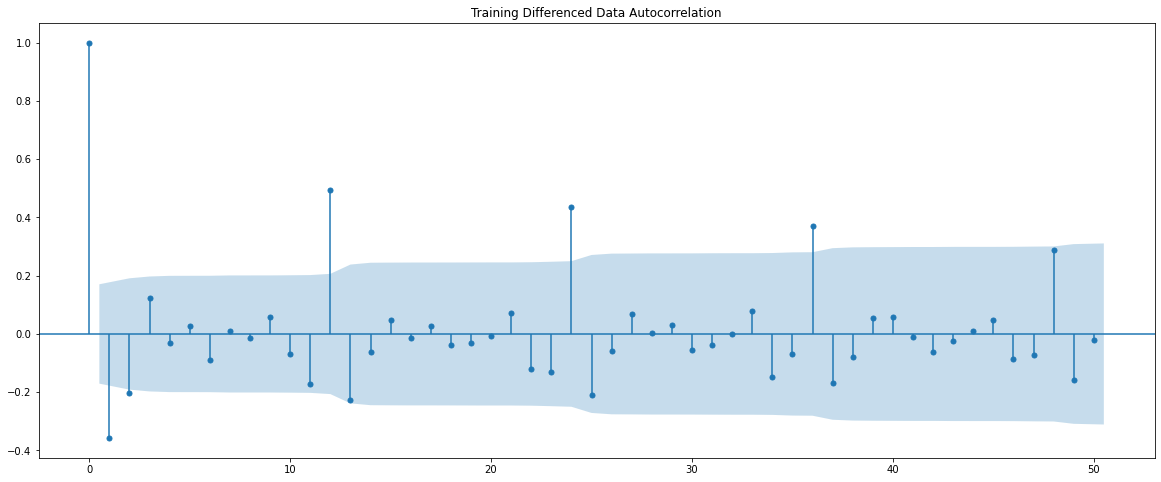

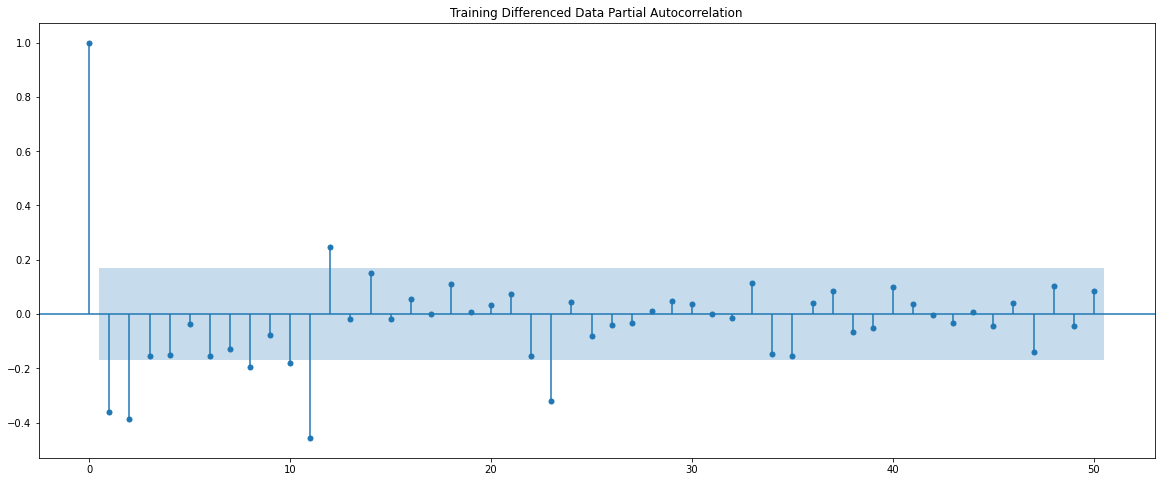

In [99]:
# Autocorrelation plot
plot_acf(train['Rose'].diff(),title='Training Differenced Data Autocorrelation',missing='drop', lags= 50)

# Partial Autocorrelation plot
plot_pacf(train['Rose'].diff().dropna(), alpha=0.05,lags = 50, title='Training Differenced Data Partial Autocorrelation')

plt.show()

From the above plot we can say the following for the non-seasonality factors (p,d,q)

1. The Auto-Regressive parameter 'p' is 3 by observing the PACF plot. The parameter is obtained where the value cuts off after a certain lag. 
2. The Moving-Average parameter 'q' is 2 by observing the ACF plot. The parameter is obtained where the value cuts off after a certain lag. 
3. The first order of differencing is always equal to 1 as we have made the Time series data into Stationarity at the 1st order for differencing.
4. By seeing the ACF plot we can that there is a significant spike at every 12 intervals. Hence our 'F' factor will be 12

Finally we can say the values of (p,d,q) is (3,1,2)

#### ACF & PACF Considering Seasonality

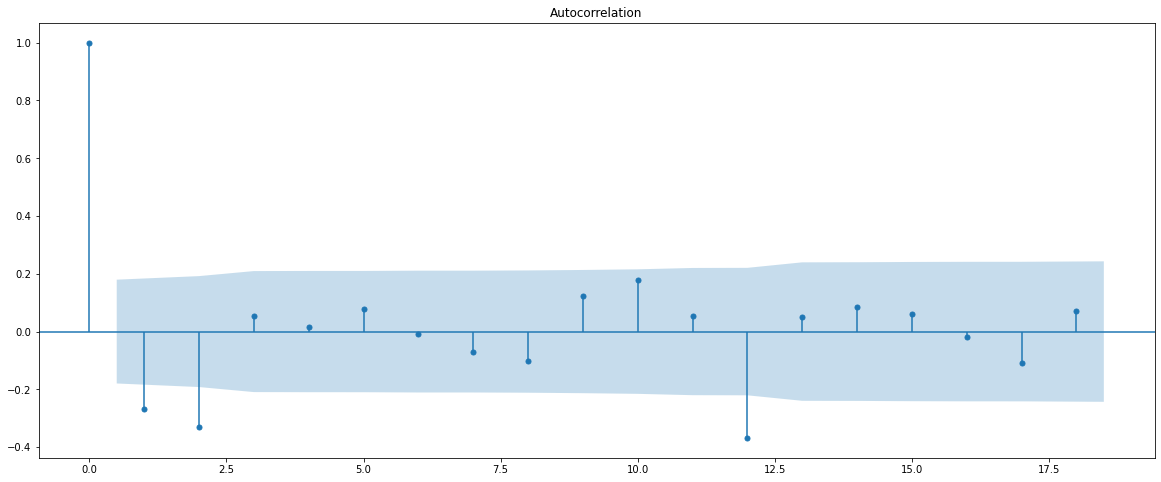

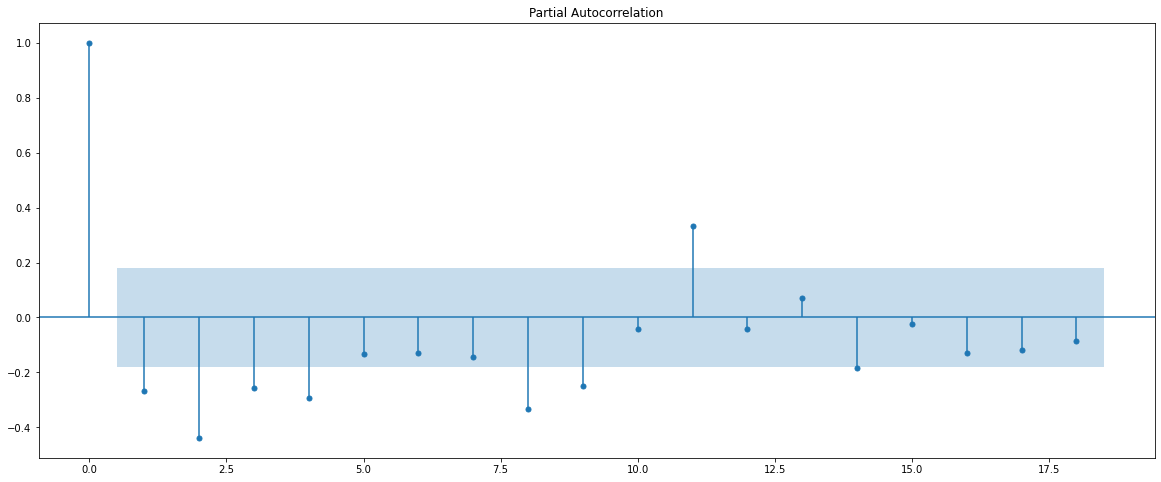

In [100]:
# Autocorrelation plot with Seasonality of 12 and Seasonal differencing

plot_acf((train['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18)

# Partial Autocorrelation plot with Seasonality of 12 and Seasonal differencing
plot_pacf((train['Rose'].diff(12).dropna()).diff(1).dropna(),lags=18)

plt.show()

From the above plot we can say the following for the seasonality factors of ARIMA model (P,D,Q)

1. The Auto-Regressive parameter 'P' is 1 by observing the PACF plot. The parameter is obtained where the value cuts off after a certain lag. 
2. The Moving-Average parameter 'Q' is 1 by observing the ACF plot. The parameter is obtained where the value cuts off after a certain lag. 
3. The Seasonal Differencing order 'D' is 1
4. Seasonality Factor 'F' is 12

Finally we can say the values of (P,D,Q,F) is (1,1,1,12)

#### Building Manual version of SARMIA model with values obtained from ACF & PACF Plots

In [101]:
# Here we will be building the model on our training set with following parameters (p,d,q)(P,D,Q,F) = (0,1,0)(1,1,1,12)


manual_sarima = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(3, 1, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

# Fitted the model in the manual_sarima function with Max iteration = 1000

sarima_manual = manual_sarima.fit(maxiter=1000)

#### Summary of the Manual Version of SARMIA

In [102]:
print(sarima_manual.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(3, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -450.705
Date:                              Tue, 15 Jun 2021   AIC                            917.409
Time:                                      22:00:45   BIC                            938.564
Sample:                                           0   HQIC                           925.980
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0775      0.163      6.623      0.000       0.759       1.396
ar.L2         -0.29

From the above summary we can see the following
1. Coefficients of different parameters of AR(p,P) & MA(q,Q) 
2. Skewness of the Dataset
3. Jarque-Bera Test Values
4. AIC (Akaike Information Criterion) Values
5. BIC Values
6. Heteroskedasticity. 

Out of which for us now AIC value is important

#### Diagnostics of the Manual SARIMA model

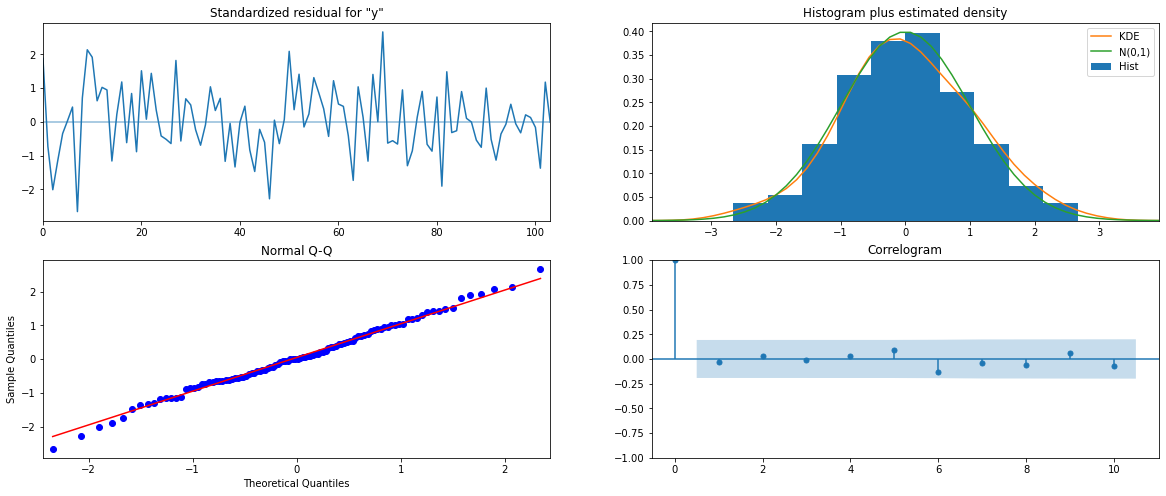

In [103]:
sarima_manual.plot_diagnostics()
plt.show()

From the plot we can say the following

1. Residual is normally distributed which satisfies one of our assumptions for building SARIMA model
2. There is no correlation between the residuals which can been seen in the Q-Q plot

#### Predicting/Forecasting on the Test Set

In [104]:
predict_manual_sarima = sarima_manual.get_forecast(len(test['Rose']))

#### Summary of Predicted Values with 95% Confidence Interval

In [105]:
predict_manual_sarima.summary_frame(alpha=0.05).head()

y,mean,mean_se,mean_ci_lower,mean_ci_upper
0,48.570809,18.363810,12.578403,84.563215
1,57.268126,19.026157,19.977543,94.558708
2,69.603286,19.052544,32.260987,106.945586
3,64.846666,19.055452,27.498666,102.194666
4,60.321493,19.055700,22.973007,97.669979


#### Evaluating the Manual SARIMA model on Test Data

In [106]:
manual_sarima_rmse = metrics.mean_squared_error(test['Rose'],predict_manual_sarima.predicted_mean,squared=False)
print("Manual SARIMA model with (p=3, d=1, q=2, P=1, D=1, Q=1, F=12) Forecast on the Test Data, RMSE is %3.3f" %(manual_sarima_rmse))

Manual SARIMA model with (p=3, d=1, q=2, P=1, D=1, Q=1, F=12) Forecast on the Test Data, RMSE is 13.487


From the above we can see that the RMSE value on Test data for Manual SARIMA is 13.487, our model performed well but not better than Auto SARIMA model.

In [107]:
results_df7 = pd.DataFrame({'Test RMSE': [manual_sarima_rmse]},index=['Manual_SARIMA (p=3, d=1, q=2, P=1, D=1, Q=1, F=12)'])

results_df = pd.concat([results_df, results_df7])
results_df

,Test RMSE
Linerar_Regression,15.268955
Naive Forecast Model,79.718773
Simple Average Model,48.289526
Holt-Winters Model with Auto Parameters,14.241476
"Holt-Winters Model (alpha = 0.10, beta = 0.20, gamma = 0.40)",12.099563
"AUTO_SARIMA (p=0, d=1, q=2, P=2, D=1, Q=2, F=12)",16.500146
"Manual_SARIMA (p=3, d=1, q=2, P=1, D=1, Q=1, F=12)",13.487382


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [108]:
# Created a dataframe and stored all the Test RMSE values of all the models we have built

results_df.sort_values('Test RMSE')

,Test RMSE
"Holt-Winters Model (alpha = 0.10, beta = 0.20, gamma = 0.40)",12.099563
"Manual_SARIMA (p=3, d=1, q=2, P=1, D=1, Q=1, F=12)",13.487382
Holt-Winters Model with Auto Parameters,14.241476
Linerar_Regression,15.268955
"AUTO_SARIMA (p=0, d=1, q=2, P=2, D=1, Q=2, F=12)",16.500146
Simple Average Model,48.289526
Naive Forecast Model,79.718773


Totally we have built around 7 models, which are 

1. Linear Regression Model
2. Naive Forecast Model
3. Simple Average Model
4. Holt-Winter's Model with Auto Parameters
5. Holt-Winter's Model (alpha=0.10, beta=0.20, gamma=0.40)
6. Auto SARIMA Model (p=0,d=1,q=2,P=2,D=1,Q=2,F=12)
7. Manual SARIMA Model (p=3,d=1,q=2,P=1,D=1,Q=1,F=12)

Out of all these seven models, by looking at the table we can say that the **top 3 models** based on the **Lowest Test RMSE values** are

1. Holt-Winter's Model (alpha=0.10, beta=0.20, gamma=0.40) with a Test RMSE of 12.099
2. Manual SARIMA Model (p=3,d=1,q=2,P=1,D=1,Q=1,F=12) with a Test RMSE of 13.487
3. Holt-Winters with Auto Parameters with a Test RMSE of 14.241

Hence we can say that Holt-Winter's Model ($\alpha$ = 0.10 , $\beta$ = 0.20,$\gamma$ = 0.40) with **Test RMSE of 12.099** is the most optimum model.

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

#### Building Holt-Winter's Model ($\alpha$ = 0.10 , $\beta$ = 0.20,$\gamma$ = 0.40) on Whole Dataset

In [109]:
# Creating the Triple Exponential Model on Complete Dataset with following parameters (alpha=0.1, beta=0.20, gamma=0.40)

model = ExponentialSmoothing(df['Rose'],trend='additive', seasonal='additive',seasonal_periods=12).fit(
                                                             smoothing_level=0.10,
                                                             smoothing_slope=0.20,
                                                             smoothing_seasonal=0.40)

#### Evaluating the Model on the whole dataset

In [110]:
rmse_model = metrics.mean_squared_error(df['Rose'],model.fittedvalues,squared=False)
print('RMSE Value for Holt-Winters Model is :',rmse_model )

RMSE Value for Holt-Winters Model is : 19.392804843337004


#### Predicting 12 Months into the Future

In [161]:
prediction = model.forecast(steps = 12)

In [162]:
prediction['Future'] = pd.DataFrame(prediction, columns = ['Rose Wine Forecasted Values'])

From the above data frame we can see the forecasted values from 31-08-1995 to 31-07-1996

#### Plotting the Forecasted Values along with Orignal Values

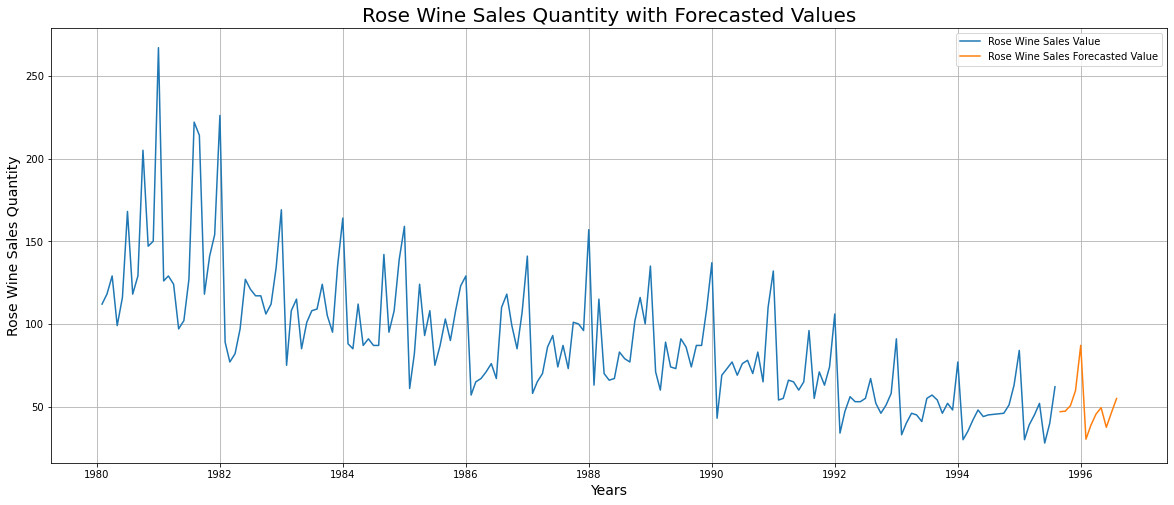

In [115]:
plt.figure(figsize=(20,8))
plt.plot(df['Rose'], label='Rose Wine Sales Value')
plt.plot(prediction['Future'], label='Rose Wine Sales Forecasted Value')
plt.legend(loc='best')
plt.xlabel('Years', fontsize = 14 )
plt.ylabel('Rose Wine Sales Quantity', fontsize = 14 )
plt.title("Rose Wine Sales Quantity with Forecasted Values", fontsize = 20)
plt.grid();
plt.show()

From the above plot we can see that the Forecasted Values 

#### Forecasting with Confidence Intervals

In [168]:
prediction_1 = model.forecast(steps=12)

In [174]:
pred_df = pd.DataFrame({'lower_CI':prediction_1 - ((np.percentile(prediction_1,[2.5,97.5])))[0],
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + ((np.percentile(prediction_1,[2.5,97.5])))[1]})
pred_df.head()

,lower_CI,prediction,upper_ci
1995-08-31,14.653509,46.953125,126.503611
1995-09-30,14.960888,47.260503,126.810989
1995-10-31,18.342323,50.641938,130.192424
1995-11-30,27.412562,59.712177,139.262664
1995-12-31,54.775747,87.075362,166.625849


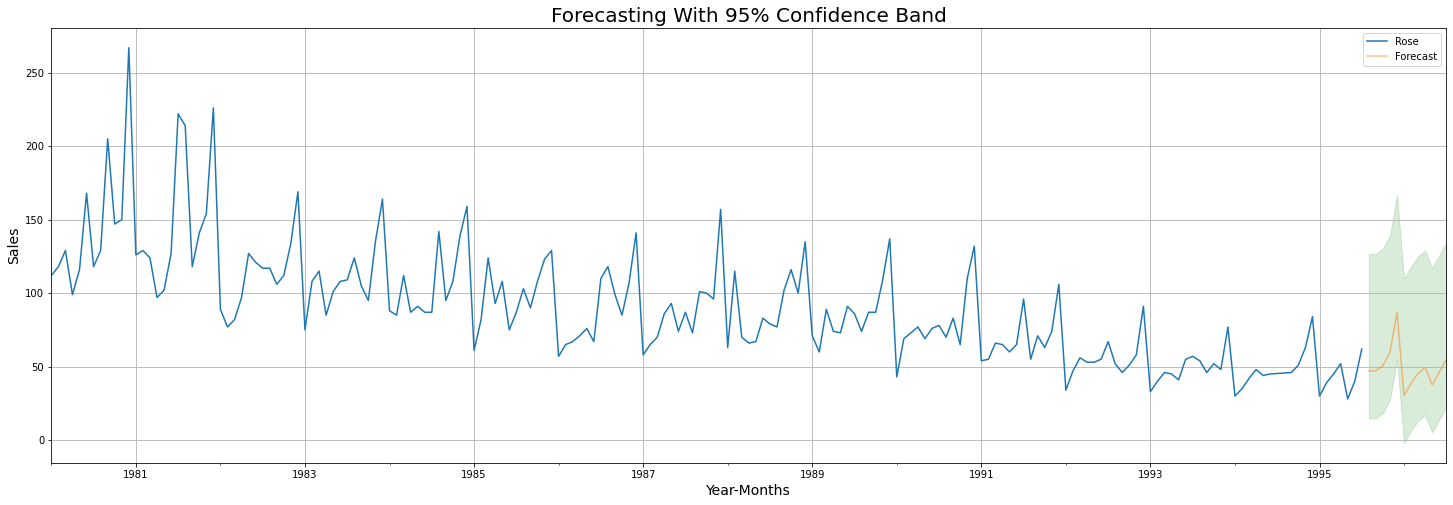

In [179]:
axis = df.plot(label='Actual', figsize=(25,8))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='g', alpha=.15)
axis.set_xlabel('Year-Months', fontsize = 14)
axis.set_ylabel('Sales', fontsize = 14)
plt.title('Forecasting With 95% Confidence Band', fontsize = 20)
plt.legend(loc='best')
plt.grid()
plt.show()

### 10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

We had a business problem where we need to Analyse and Forecast Rose Wine Sales in the 20th Century. The given data consisted of **187 Observations** and **2 Variables** (YearMonth & Rose). Datasets are of Object & Integer type. The time series in the given dataset is starts from **January - 1980 to July-1995**

After loading the dataset we converted the YearMonth variable into appropriate time stamp series so as to proceed with our Time Series Forecasting. 

**From the EDA Analysis We can understand the following**,

1. Dataset consists of 2 null values, which we have imputed.
2. Minimum Sales Value 28 is  & Maximum Sales Value is 267. 
3. We can see a presence of declining Trend & Seasonality from the plot.
4. Sales quantity during the year 1995 reduced drastically when compared to others.
5. Sales were high during the years from 1980 to 1988 and drastically reduced over the years.
6. From the Monthly Box We can Say,

    a. The average Rose Wine sales were less during the period January to August across all years

    b. The average Rose Wine sales were very high during November & December across all the years might be because of the chritsmas holidays.
    
    
7. From the above Empirical Cumulative Distribution Plot we can say that around **60% of the Rose Wine Sales quantity is less than 90**
8. From the average plot we can see a declining trend and the median values is stable.
9. From the Decomposition plot we can clearly see presence of Trend & Seasonality. Residual clustering around 1.

We have splitted the data as mentioned that the train set is below 1991 and test is from 1991. Based on that we have built around seven models,

1. Linear Regression Model
2. Naive Forecast Model
3. Simple Average Model
4. Holt-Winter's Model with Auto Parameters
5. Holt-Winter's Model (alpha=0.10, beta=0.20, gamma=0.40)
6. Auto SARIMA Model (p=0,d=1,q=2,P=2,D=1,Q=2,F=12)
7. Manual SARIMA Model (p=3,d=1,q=2,P=1,D=1,Q=1,F=12)

Out of all these seven models, we can say that the **top 3 models** based on the **Lowest Test RMSE values** are

1. Holt-Winter's Model (alpha=0.10, beta=0.20, gamma=0.40) with a **Test RMSE of 12.099**
2. Auto SARIMA Model   (p=0,d=1,q=2,P=2,D=1,Q=2,F=12) with a **Test RMSE of 13.487**
3. Holt-Winter's Model with Auto Parameters (p=3,d=1,q=2,P=1,D=1,Q=1,F=12) with a **Test RMSE of 14.241**

Hence we can say that Holt-Winter's Model ($\alpha$ = 0.10 , $\beta$ = 0.20, $\gamma$ = 0.40) with **Test RMSE of 12.099** is the most optimum model.

Based on the **Test RMSE value** we have opted for Holt-Winter's Model  ($\alpha$ = 0.10 , $\beta$ = 0.20,$\gamma$ = 0.40) and built the model on the complete dataset. The RMSE for the complete dataset is **19.392**. Based on the model we have forecasted for 12 months into the future and plotted the same. 

**Recommendations & Insights**

1. As the demand for Wine is less during the period from January to August, company can maintain average stock.

2. As year ends the demand for wine increases hence it would be optimal to increase the production from **October to December** and keep a Maximum stock available so as the Sales value increases. 

3. December month shows the highest Sales across years 1980-1995.